In [2]:
from graphviz import Digraph

In [ ]:
a = 1
b = 2
c = a*b
d = 4
e = c+d
f = 5
L = e+f




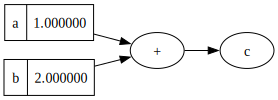

In [24]:
from graphviz import Digraph

dot = Digraph(format='svg', graph_attr={"rankdir":"LR"})

dot.node(name='a', label= "{%s| %4f}"%('a',1), shape="record")
dot.node(name='b', label= "{%s| %4f}"%('b',2), shape="record")

dot.node(name='ab+',label="+")


dot.edge('a','ab+')
dot.edge('b','ab+')
dot.edge('ab+','c')

dot

In [25]:
class Value:
    def __init__(self, data, op="", label = "", children =()):
        self.data = data
        self._op = op
        self._prev = set(children)
        self.label = label
        self.grad = 0

    def __add__(self, other):
      other = other  if isinstance(other,Value) else Value(other)

      out = Value(self.data+other.data, op="+", children=(self,other))
      return out
    
    
    def __mul__(self, other):
      other = other  if isinstance(other,Value) else Value(other)

      out = Value(self.data*other.data, op="*", children=(self,other))
      return out
    
    def __repr__(self):
       return f"Value (data = {self.data})"





In [26]:
a = Value(1)
b = Value(2)
c = a + b

In [53]:
def trace(root):
    nodes, edges = set(),set()

    def build(v):

        if v not in nodes:
            nodes.add(v)

        for child in v._prev:
            edges.add((child,v))
            build(child)

    build(root)
    return nodes, edges



def draw_dot(root):
    dot = Digraph(format="svg", graph_attr={'rankdir':'LR'})
    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label="{%s}" % (n.data), shape='record')

        if n._op:
            dot.node(name=uid+ n._op, label= n._op)
            dot.edge(uid+ n._op, uid )

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot
        



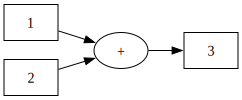

In [54]:
draw_dot(c)

In [61]:
sorted([-1,0,1,2,-1,-4])


[-4, -1, -1, 0, 1, 2]